In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("sonar.all-data.csv",header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
y=df[60]
x=df.drop(df.columns[60], axis=1).astype(float)
df[60].value_counts()


M    111
R     97
Name: 60, dtype: int64

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

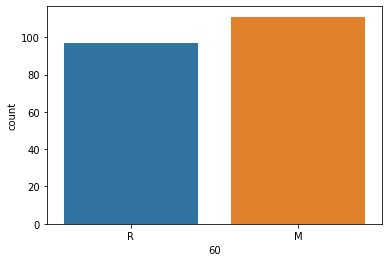

In [6]:
sns.countplot(x=df[60], data=df)

In [7]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
y = encod.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [8]:
from keras.models import Sequential 
from keras.layers import Dense
input_dim = 60
model = Sequential() # This initializes a sequential model to which you we can keep adding layers.
model.add(Dense(200, kernel_initializer='uniform', input_dim = 60, activation='relu')) 
model.add(Dense(300, kernel_initializer='uniform', activation='relu'))# Add a dense layer with uniform probability.
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [9]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)

model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy']) 

In [10]:
nb_epochs = 10
fitmodel = model.fit(X_train, y_train, epochs=nb_epochs,  validation_split=0.25) 

Epoch 1/10
4/4 [==============================] - 0s 66ms/step - loss: 0.6953 - accuracy: 0.4701 - val_loss: 0.6885 - val_accuracy: 0.5641
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6921 - accuracy: 0.5214 - val_loss: 0.6894 - val_accuracy: 0.7179
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6889 - accuracy: 0.5983 - val_loss: 0.6857 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6865 - accuracy: 0.5556 - val_loss: 0.6802 - val_accuracy: 0.5897
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6814 - accuracy: 0.5385 - val_loss: 0.6739 - val_accuracy: 0.6667
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6724 - accuracy: 0.6154 - val_loss: 0.6681 - val_accuracy: 0.7949
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6611 - accuracy: 0.6838 - val_loss: 0.6562 - val_accuracy: 0.7949
Epoch 8/10
4/4 [===========

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               12200     
_________________________________________________________________
dense_1 (Dense)              (None, 300)               60300     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
Total params: 72,801
Trainable params: 72,801
Non-trainable params: 0
_________________________________________________________________


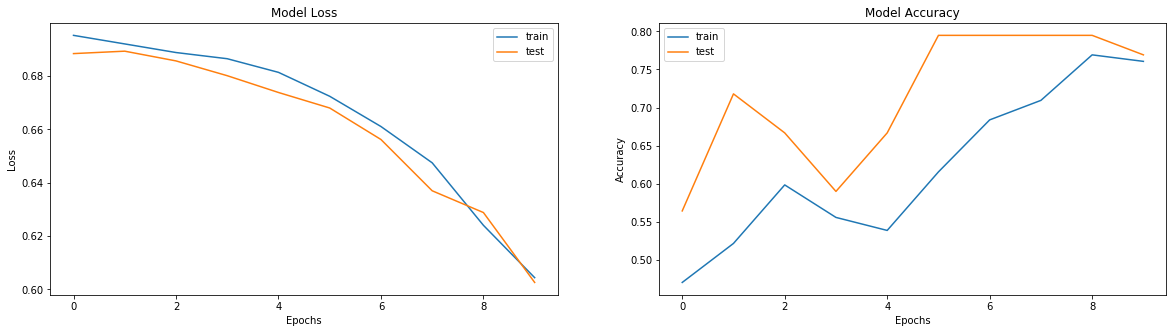

In [14]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(fitmodel.history['loss'])
plt.plot(fitmodel.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])


plt.subplot(1,2,2)
plt.plot(fitmodel.history['accuracy'])
plt.plot(fitmodel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])


In [20]:
test_pred = model.predict_classes(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,classification_report
cm = confusion_matrix(y_test,test_pred)
print(classification_report(y_test, test_pred))
print("accuracy score = ", accuracy_score(y_test,test_pred))
print("recall score = ",recall_score(y_test,test_pred,average="macro"))
print("True Negative =", cm[0,0])
print("False Positive =", cm[0,1])
print("False Negative =", cm[1,0])
print("True Positive =", cm[1,1])


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.86      0.86      0.86        22

    accuracy                           0.88        52
   macro avg       0.88      0.88      0.88        52
weighted avg       0.88      0.88      0.88        52

accuracy score =  0.8846153846153846
recall score =  0.8818181818181818
True Negative = 27
False Positive = 3
False Negative = 3
True Positive = 19
